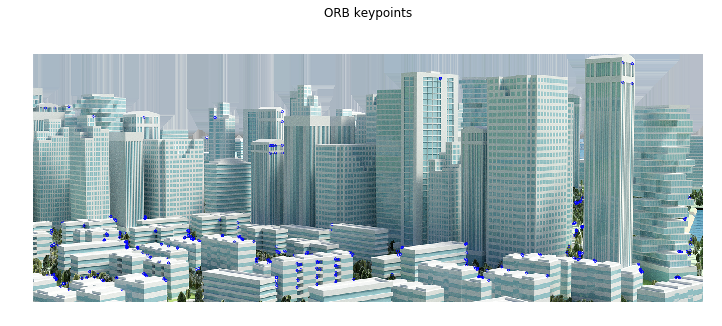

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
%matplotlib inline 

def _plot_mulitple(img1, img2):     
    """     
    Converts an image from BGR to RGB and plots     
    """   

    fig, ax = plt.subplots(nrows=1, ncols=2)

    ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))          
    ax[0].set_title('Image 1')
    ax[0].axis('off')
    
    ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))          
    ax[1].set_title('Image 2')
    ax[1].axis('off')

    plt.show()

def _compute_orb_keypoints(filename):
    """
    Reads image from filename and computes ORB keypoints
    Returns image, keypoints and descriptors. 
    """
    # load image
    img = cv2.imread(filename)
    
    # create orb object
    orb = cv2.ORB_create()
    
    # set parameters 
    orb.setScoreType(cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
    orb.setWTA_K(3)
    
    # detect keypoints
    kp = orb.detect(img,None)

    # for detected keypoints compute descriptors. 
    kp, des = orb.compute(img, kp)
    return img,kp, des

def _draw_keyp(img, kp):
    """
    Takes image and keypoints and plots on the same images
    Does not display it. 
    """
    cv2.drawKeypoints(img,kp,img, color=(255,0,0), flags=2) 
    return img


def _plot_img(img, figsize=(12,8)):
    """
    Plots image using matplotlib for the given figsize
    """
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1,1,1)

    # image need to be converted to RGB format for plotting
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('ORB keypoints')
    plt.show()



def main():
    # read an image 
    filename = 'pics/building.png'
    # compute ORB keypoints
    img1,kp1, des1 = _compute_orb_keypoints(filename)
    # draw keypoints on image 
    img1 = _draw_keyp(img1, kp1)
    # plot one image image with keypoints
    _plot_img(img1)
    

if __name__ == '__main__':
    main()